In [1]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


# Se sube el archivo kaggle.json

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"estebanlunasena","key":"ae94525e6c6068721969f0a88caefe17"}'}

#Descargamos los datos desde kaggle
-  Se crea una carpeta oculta llamada .kaggle en el directorio personal
- Se Copia el archivo kaggle.json a esa carpeta .kaggle.
- Se Cambia los permisos del archivo para que solo yo pueda leerlo (seguridad).
- Se Usa la Kaggle API para descargar los archivos de la competencia udea-ai-4-eng-20251-pruebas-saber-pro-colombia.
Esto baja un archivo .zip con los datos de la competencia.

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia



# Se lista los archivos que están en el directorio actual

In [5]:
!ls

kaggle.json  sample_data  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip


# Se descomprime el archivo .zip

In [6]:
import zipfile

with zipfile.ZipFile("udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## leemos el archivo train.csv con pandas

In [8]:
df = pd.read_csv("train.csv")
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


# **EXPLORACION DE LOS DATOS**

## Se hace un resumen estadístico rápido de las columnas numéricas del DataFrame df

In [9]:
df.describe()

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


# Un conteo de las columnas que tienen valores desconocidos

In [10]:
for i in df.columns:
    print ("%20s"%i, np.sum(df[i].isna()))

                  ID 0
             PERIODO 0
 ESTU_PRGM_ACADEMICO 0
ESTU_PRGM_DEPARTAMENTO 0
ESTU_VALORMATRICULAUNIVERSIDAD 6287
ESTU_HORASSEMANATRABAJA 30857
FAMI_ESTRATOVIVIENDA 32137
  FAMI_TIENEINTERNET 26629
 FAMI_EDUCACIONPADRE 23178
  FAMI_TIENELAVADORA 39773
 FAMI_TIENEAUTOMOVIL 43623
ESTU_PRIVADO_LIBERTAD 0
ESTU_PAGOMATRICULAPROPIO 6498
FAMI_TIENECOMPUTADOR 38103
FAMI_TIENEINTERNET.1 26629
 FAMI_EDUCACIONMADRE 23664
  RENDIMIENTO_GLOBAL 0
              coef_1 0
              coef_2 0
              coef_3 0
              coef_4 0


# Un conteo y grafica de familias que tienen internet

In [11]:
df.FAMI_TIENEINTERNET.value_counts()

,count
FAMI_TIENEINTERNET,
Si,592514
No,73357


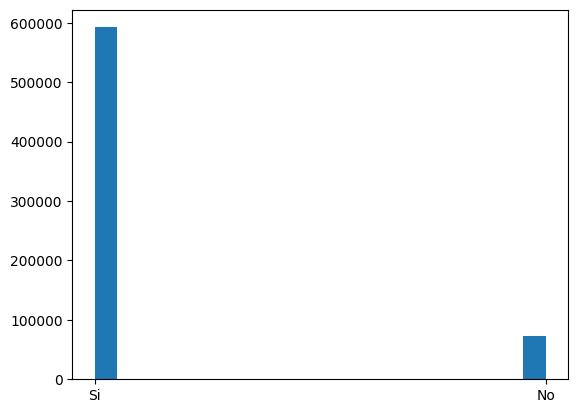

In [12]:
plt.hist(df.FAMI_TIENEINTERNET.dropna().values, bins=20);

# Un conteo y grafica de familias que tienen computador

In [13]:
df.FAMI_TIENECOMPUTADOR.value_counts()

,count
FAMI_TIENECOMPUTADOR,
Si,597670
No,56727


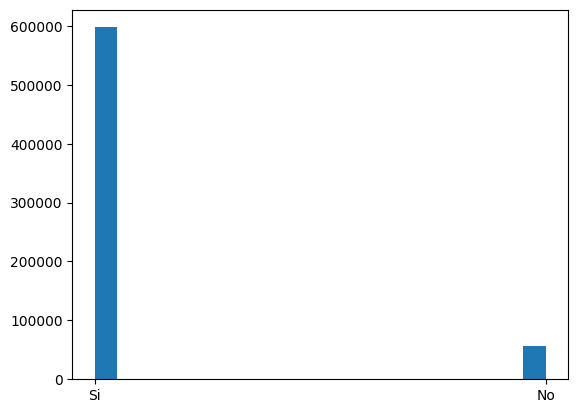

In [14]:
plt.hist(df.FAMI_TIENECOMPUTADOR.dropna().values, bins=20);

# Se muestra las primeras 20 carreras con mas estudiantes

In [15]:
df.ESTU_PRGM_ACADEMICO.value_counts().head(20)

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
ADMINISTRACIÓN DE EMPRESAS,24777
INGENIERIA CIVIL,19487
MEDICINA,18099
PSICOLOGÍA,17377


#Grafica de distribución de horas en las que trabajan los estudiantes

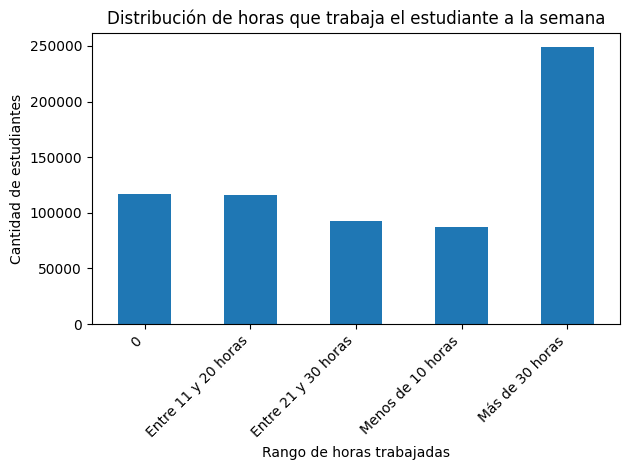

In [17]:
import matplotlib.pyplot as plt

df['ESTU_HORASSEMANATRABAJA'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de horas que trabaja el estudiante a la semana')
plt.xlabel('Rango de horas trabajadas')
plt.ylabel('Cantidad de estudiantes')
plt.tight_layout()
plt.show()
